Perform the following operations using R/Python on the data sets:
a) Compute and display summary statistics for each feature available in the dataset. (e.g. minimum value, maximum value, mean, range, standard deviation, variance and percentiles
b) Illustrate the feature distributions using histogram.
c) Data cleaning, Data integration, Data transformation, Data model building (e.g. Classification)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("admission.csv")

In [ ]:
print("Basic Summary Statistics:\n")
print(df.describe())

Basic Summary Statistics:

       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit   
count  500.00000  500.000000  500.000000         500.00000  
mean     3.48400    8.576440    0.560000           0.72174  
std      0.92545    0.604813    0.496884           0.14114  
min      1.00000    6.800000    0.0

In [ ]:
# Custom statistics
print("\nCustom Summary Statistics:\n")
summary = pd.DataFrame({
    'Min': df.min(),
    'Max': df.max(),
    'Mean': df.mean(),
    'Range': df.max() - df.min(),
    'Std Dev': df.std(),
    'Variance': df.var(),
    '25th %ile': df.quantile(0.25),
    '50th %ile (Median)': df.quantile(0.5),
    '75th %ile': df.quantile(0.75)
})
print(summary)


Custom Summary Statistics:

                      Min     Max       Mean   Range     Std Dev  \
Serial No.           1.00  500.00  250.50000  499.00  144.481833   
GRE Score          290.00  340.00  316.47200   50.00   11.295148   
TOEFL Score         92.00  120.00  107.19200   28.00    6.081868   
University Rating    1.00    5.00    3.11400    4.00    1.143512   
SOP                  1.00    5.00    3.37400    4.00    0.991004   
LOR                  1.00    5.00    3.48400    4.00    0.925450   
CGPA                 6.80    9.92    8.57644    3.12    0.604813   
Research             0.00    1.00    0.56000    1.00    0.496884   
Chance of Admit      0.34    0.97    0.72174    0.63    0.141140   

                       Variance  25th %ile  50th %ile (Median)  75th %ile  
Serial No.         20875.000000   125.7500              250.50     375.25  
GRE Score            127.580377   308.0000              317.00     325.00  
TOEFL Score           36.989114   103.0000              107.00

#Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Research'] = le.fit_transform(df['Research'])

# Standard scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df.iloc[:, 1:8] = sc.fit_transform(df.iloc[:, 1:8])

<ipython-input-7-ed15606d7ebf>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.81923762  0.66714832 -0.0418297   0.48990382 -0.21907421  1.19888185
  0.40128156 -0.75080773 -1.28254125  0.57852607  0.75577058  0.93301508
  1.02163734 -0.83942999 -0.48494097 -0.21907421  0.04679255  0.22403706
  0.1354148  -1.193919   -0.39631872  0.75577058  1.02163734  1.55337086
  1.73061537  2.08510438  0.48990382 -1.63703027 -1.90289703 -0.57356322
 -1.45978576  0.93301508  1.90785987  2.08510438  1.2875041   0.31265931
 -1.54840801 -1.45978576 -1.10529675 -0.83942999 -0.75080773 -0.0418297
 -0.30769646  1.37612635  0.84439283  0.48990382  1.11025959  1.99648213
  0.40128156  0.93301508 -0.30769646 -0.39631872  1.55337086  0.66714832
  0.48990382  0.31265931 -0.0418297  -1.63703027 -1.45978576 -0.48494097
 -0.66218548 -0.83942999 -1.10529675 -0.13045196  0.75577058  0.75577058
  0.93301508 -0.0418297   0.1354148   1.021637

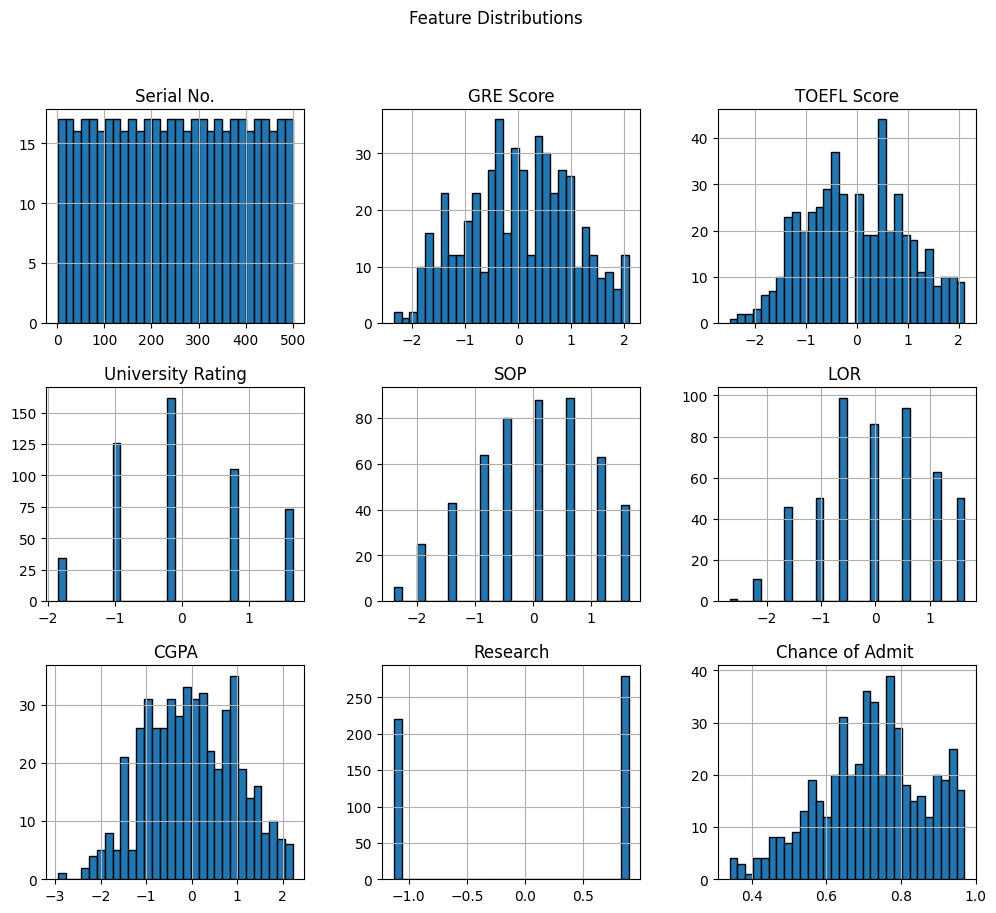

In [ ]:
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

# Data Pre-processing

In [ ]:
# Display missing values
print("\nMissing Values:\n")
print(df.isnull().sum())


Missing Values:

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [ ]:
# Option 1: Drop rows with missing values
df_cleaned = df.dropna()

In [ ]:
# Option 2: Fill missing numeric values with mean
df_filled = df.fillna(df.mean(numeric_only=True))

In [ ]:
# Remove duplicates
df_filled = df_filled.drop_duplicates()

In [ ]:
# Display cleaned data shape
print("\nCleaned Data Shape:", df_filled.shape)


Cleaned Data Shape: (500, 9)


In [ ]:
# Optional: Remove outliers using IQR method
Q1 = df_filled.quantile(0.25)
Q3 = df_filled.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Filtering out the outliers
df_no_outliers = df_filled[~((df_filled < (Q1 - 1.5 * IQR)) | (df_filled > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nFinal Data Shape after removing outliers:", df_no_outliers.shape)


Final Data Shape after removing outliers: (497, 9)


#Feeding to model and training

In [ ]:
X = df_no_outliers.iloc[:, 1:8].values
y = df_no_outliers.iloc[:, 8].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

#Prediction and Evaluation

In [ ]:
# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.004417413095474897
R² Score: 0.7365670027220514


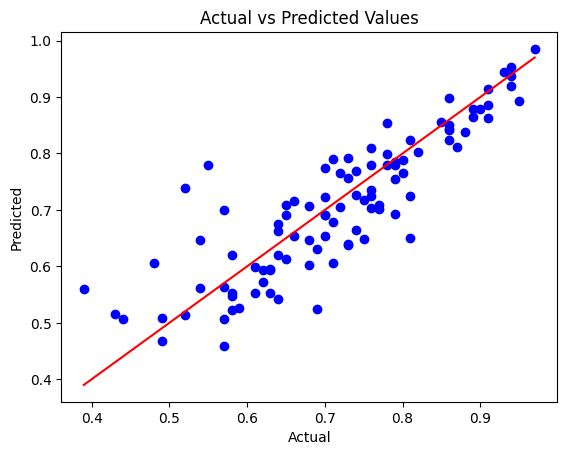

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # perfect fit line
plt.show()